# Transforming Text into Structured Form

## Bag of Words Representation

In [98]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import re
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SURINDER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SURINDER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Input the sentences

In [99]:
sentences = ["We would like to learn about Natural Language Processing Here",
            "Natural Language Processing allows computers to understand and generate language data",
            "The topic of Natural Language Processing has got lot of futuristic applications"]

In [100]:
#Create a Pandas Series of the object
corpus = pd.Series(sentences)
corpus

0    We would like to learn about Natural Language ...
1    Natural Language Processing allows computers t...
2    The topic of Natural Language Processing has g...
dtype: object

### Data preprocessing

In [101]:
import pandas as pd
import re

def text_clean(corpus, keep_list):
    '''
    Purpose : Function to keep only alphabets, digits and certain words (punctuations, qmarks, tabs etc. removed)

    Input : Takes a text corpus, 'corpus' to be cleaned along with a list of words, 'keep_list', which have to be retained
            even after the cleaning process

    Output : Returns the cleaned text corpus

    '''
    cleaned_corpus = []  # Use a list to accumulate your results
    for row in corpus:
        qs = []
        for word in row.split():
            if word not in keep_list:
                p1 = re.sub(pattern='[^a-zA-Z0-9]', repl=' ', string=word)
                p1 = p1.lower()
                qs.append(p1)
            else:
                qs.append(word)
        cleaned_corpus.append(' '.join(qs))  # Append the cleaned row to the list
    return pd.Series(cleaned_corpus)  # Convert the list to a Series before returning

# Example usage (assuming the rest of the functions are correctly defined and 'corpus' and 'common_dot_words' are defined)
# preprocessed_corpus = preprocess(corpus, keep_list=common_dot_words, stemming=False, stem_type=None,
#                                 lemmatization=True, remove_stopwords=True)
# print(preprocessed_corpus)

In [102]:
def stopwords_removal(corpus):
    wh_words = ['who', 'what', 'when', 'why', 'how', 'which', 'where', 'whom']
    stop = set(stopwords.words('english'))
    for word in wh_words:
        stop.remove(word)
    corpus = [[x for x in x.split() if x not in stop] for x in corpus]
    return corpus

In [103]:
def lemmatize(corpus):
    lem = WordNetLemmatizer()
    corpus = [[lem.lemmatize(x, pos = 'v') for x in x] for x in corpus]
    return corpus

In [104]:
def stem(corpus, stem_type = None):
    if stem_type == 'snowball':
        stemmer = SnowballStemmer(language = 'english')
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    else :
        stemmer = PorterStemmer()
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    return corpus

In [105]:
def preprocess(corpus, keep_list, cleaning = True, stemming = False, stem_type = None, lemmatization = False, remove_stopwords = True):
    '''
    Purpose : Function to perform all pre-processing tasks (cleaning, stemming, lemmatization, stopwords removal etc.)
    
    Input : 
    'corpus' - Text corpus on which pre-processing tasks will be performed
    'keep_list' - List of words to be retained during cleaning process
    'cleaning', 'stemming', 'lemmatization', 'remove_stopwords' - Boolean variables indicating whether a particular task should 
                                                                  be performed or not
    'stem_type' - Choose between Porter stemmer or Snowball(Porter2) stemmer. Default is "None", which corresponds to Porter
                  Stemmer. 'snowball' corresponds to Snowball Stemmer
    
    Note : Either stemming or lemmatization should be used. There's no benefit of using both of them together
    
    Output : Returns the processed text corpus
    
    '''
    
    if cleaning == True:
        corpus = text_clean(corpus, keep_list)
    
    if remove_stopwords == True:
        corpus = stopwords_removal(corpus)
    else :
        corpus = [[x for x in x.split()] for x in corpus]
    
    if lemmatization == True:
        corpus = lemmatize(corpus)
        
        
    if stemming == True:
        corpus = stem(corpus, stem_type)
    
    corpus = [' '.join(x) for x in corpus]        

    return corpus

In [106]:
common_dot_words = ['U.S.', 'Mr.', 'Mrs.', 'D.C.']

In [107]:
# Preprocessing with Lemmatization
preprocessed_corpus = preprocess(corpus, keep_list = common_dot_words, stemming = False, stem_type = None,
                                lemmatization = True, remove_stopwords = True)
preprocessed_corpus

['would like learn natural language process',
 'natural language process allow computers understand generate language data',
 'topic natural language process get lot futuristic applications']

### Building the vocabulary

In [108]:
set_of_words = set()
for sentence in preprocessed_corpus:
    for word in sentence.split():
        set_of_words.add(word)
vocab = list(set_of_words)
print(vocab)

['topic', 'lot', 'get', 'data', 'natural', 'generate', 'language', 'process', 'futuristic', 'computers', 'applications', 'learn', 'allow', 'would', 'like', 'understand']


In [109]:
len(vocab)

16

## CountVectorizer for Bag of Words Model

In [110]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SURINDER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SURINDER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [111]:
preprocessed_corpus

['would like learn natural language process',
 'natural language process allow computers understand generate language data',
 'topic natural language process get lot futuristic applications']

In [112]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(preprocessed_corpus)

In [113]:
print(vectorizer.get_feature_names_out())
print(bow_matrix.toarray())

['allow' 'applications' 'computers' 'data' 'futuristic' 'generate' 'get'
 'language' 'learn' 'like' 'lot' 'natural' 'process' 'topic' 'understand'
 'would']
[[0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1]
 [1 0 1 1 0 1 0 2 0 0 0 1 1 0 1 0]
 [0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0]]


In [114]:
bow_matrix.toarray().shape

(3, 16)

### bigrams and trigrams

In [115]:
vectorizer_ngram_range = CountVectorizer(analyzer='word', ngram_range=(1,3))
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(preprocessed_corpus)

In [116]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['allow' 'allow computers' 'allow computers understand' 'applications'
 'computers' 'computers understand' 'computers understand generate' 'data'
 'futuristic' 'futuristic applications' 'generate' 'generate language'
 'generate language data' 'get' 'get lot' 'get lot futuristic' 'language'
 'language data' 'language process' 'language process allow'
 'language process get' 'learn' 'learn natural' 'learn natural language'
 'like' 'like learn' 'like learn natural' 'lot' 'lot futuristic'
 'lot futuristic applications' 'natural' 'natural language'
 'natural language process' 'process' 'process allow'
 'process allow computers' 'process get' 'process get lot' 'topic'
 'topic natural' 'topic natural language' 'understand'
 'understand generate' 'understand generate language' 'would' 'would like'
 'would like learn']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0
  0 0 0 0 0 0 0 0 1 1 1]
 [1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 2 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
  0 0

In [117]:
bow_matrix_ngram.toarray().shape

(3, 47)

### Understanding Max Features

In [118]:
vectorizer_max_features = CountVectorizer(analyzer='word', ngram_range=(1,3), max_features = 6)
bow_matrix_max_features = vectorizer_max_features.fit_transform(preprocessed_corpus)

In [119]:
print(vectorizer_max_features.get_feature_names_out())
print(bow_matrix_max_features.toarray())

['language' 'language process' 'natural' 'natural language'
 'natural language process' 'process']
[[1 1 1 1 1 1]
 [2 1 1 1 1 1]
 [1 1 1 1 1 1]]


In [120]:
bow_matrix_max_features.toarray().shape

(3, 6)

### Limitations of Count Vectorizer

## Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer

In [121]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SURINDER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SURINDER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [122]:
preprocessed_corpus

['would like learn natural language process',
 'natural language process allow computers understand generate language data',
 'topic natural language process get lot futuristic applications']

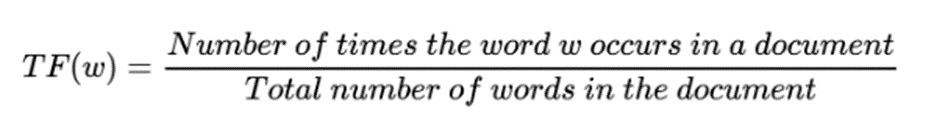

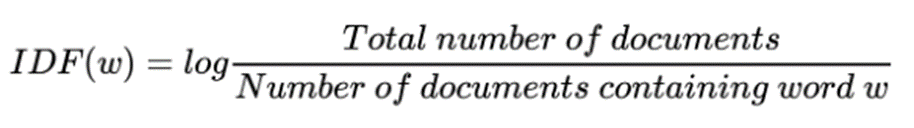

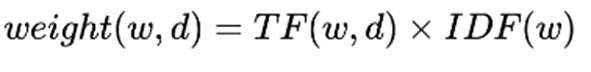

In [123]:
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(preprocessed_corpus)

In [124]:
print(vectorizer.get_feature_names_out())

['allow' 'applications' 'computers' 'data' 'futuristic' 'generate' 'get'
 'language' 'learn' 'like' 'lot' 'natural' 'process' 'topic' 'understand'
 'would']


In [125]:
print(tf_idf_matrix.toarray())

[[0.         0.         0.         0.         0.         0.
  0.         0.29360705 0.49711994 0.49711994 0.         0.29360705
  0.29360705 0.         0.         0.49711994]
 [0.3754794  0.         0.3754794  0.3754794  0.         0.3754794
  0.         0.44352836 0.         0.         0.         0.22176418
  0.22176418 0.         0.3754794  0.        ]
 [0.         0.40667606 0.         0.         0.40667606 0.
  0.40667606 0.24018943 0.         0.         0.40667606 0.24018943
  0.24018943 0.40667606 0.         0.        ]]


In [126]:
print("\nThe shape of the TF-IDF matrix is: ", tf_idf_matrix.shape)


The shape of the TF-IDF matrix is:  (3, 16)


### N-grams and Max features with TfidfVectorizer

In [127]:
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2", analyzer='word', ngram_range=(1,3), max_features = 6)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(preprocessed_corpus)

In [129]:
print(vectorizer_n_gram_max_features.get_feature_names_out())

['language' 'language process' 'natural' 'natural language'
 'natural language process' 'process']


In [130]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.66666667 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]]


In [131]:
print("\nThe shape of the TF-IDF matrix is: ", tf_idf_matrix_n_gram_max_features.shape)


The shape of the TF-IDF matrix is:  (3, 6)


### Benefits and Limitations of TF_IDF

## Cosine Similarity Calculation

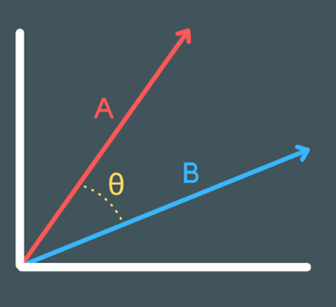

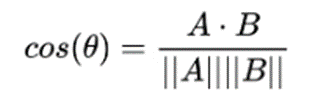

In [132]:
def cosine_similarity(vector1, vector2):
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    return np.dot(vector1, vector2) / (np.sqrt(np.sum(vector1**2)) * np.sqrt(np.sum(vector2**2)))

### Cosine similarity between the document vectors built using CountVectorizer

In [133]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(preprocessed_corpus)

In [135]:
print(vectorizer.get_feature_names_out())
print(bow_matrix.toarray())

['allow' 'applications' 'computers' 'data' 'futuristic' 'generate' 'get'
 'language' 'learn' 'like' 'lot' 'natural' 'process' 'topic' 'understand'
 'would']
[[0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1]
 [1 0 1 1 0 1 0 2 0 0 0 1 1 0 1 0]
 [0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0]]


In [136]:
for i in range(bow_matrix.shape[0]):
    for j in range(i + 1, bow_matrix.shape[0]):
        print("The cosine similarity between the documents ", i, "and", j, "is: ",
              cosine_similarity(bow_matrix.toarray()[i], bow_matrix.toarray()[j]))

The cosine similarity between the documents  0 and 1 is:  0.492365963917331
The cosine similarity between the documents  0 and 2 is:  0.43301270189221935
The cosine similarity between the documents  1 and 2 is:  0.42640143271122083


### Cosine similarity between the document vectors built using TfidfVectorizer

In [137]:
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(preprocessed_corpus)

In [139]:
print(vectorizer.get_feature_names_out())
print(tf_idf_matrix.toarray())
print("\nThe shape of the TF-IDF matrix is: ", tf_idf_matrix.shape)

['allow' 'applications' 'computers' 'data' 'futuristic' 'generate' 'get'
 'language' 'learn' 'like' 'lot' 'natural' 'process' 'topic' 'understand'
 'would']
[[0.         0.         0.         0.         0.         0.
  0.         0.29360705 0.49711994 0.49711994 0.         0.29360705
  0.29360705 0.         0.         0.49711994]
 [0.3754794  0.         0.3754794  0.3754794  0.         0.3754794
  0.         0.44352836 0.         0.         0.         0.22176418
  0.22176418 0.         0.3754794  0.        ]
 [0.         0.40667606 0.         0.         0.40667606 0.
  0.40667606 0.24018943 0.         0.         0.40667606 0.24018943
  0.24018943 0.40667606 0.         0.        ]]

The shape of the TF-IDF matrix is:  (3, 16)


In [140]:
for i in range(tf_idf_matrix.shape[0]):
    for j in range(i + 1, tf_idf_matrix.shape[0]):
        print("The cosine similarity between the documents ", i, "and", j, "is: ",
              cosine_similarity(tf_idf_matrix.toarray()[i], tf_idf_matrix.toarray()[j]))

The cosine similarity between the documents  0 and 1 is:  0.2604461036246601
The cosine similarity between the documents  0 and 2 is:  0.211563930953806
The cosine similarity between the documents  1 and 2 is:  0.2130616528519106
